# Python Advanced

![python](https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg)

## iterator(迭代器) and generator(生成器)

### Iterable 
* We already know that there are several types of data that can act directly on a for loop:
One is the collection data type, such as list, tuple, dict, set, str, etc.

In [ ]:
from collections import Iterable
print '[] is: ',isinstance([], Iterable)
print '{} is:',isinstance({}, Iterable)
print 'string is:', isinstance('abc', Iterable)
print 'tuple is:', isinstance((x for x in range(10)), Iterable)
print 'int is:', isinstance(100, Iterable)


In [ ]:
from collections import Iterator
print isinstance((x for x in range(10)), Iterator)

print isinstance([], Iterator)

print isinstance({}, Iterator)

print isinstance('abc', Iterator)


**list、dict、str虽然是Iterable，却不是Iterator.**

**可以被next()函数调用并不断返回下一个值的对象称为迭代器：Iterator。**

**可以使用isinstance()判断一个对象是否是Iterator对象**

### iter
we can use iter() to change list、dict、str Iterable instant to Iterator


In [ ]:
print isinstance(iter([]), Iterator)

print isinstance(iter('abc'), Iterator)

a = iter("abcd")
print next(a)
print next(a)



In [ ]:
my_string = "hello, world"
my_iter = iter(my_string)
print next(my_iter)
print next(my_iter)

my_list = [1, 2, 3, 4]
try:
    next(my_list)
except Exception, e:
    print 'exception:', e
my_iter = iter(my_list)
next(my_iter)


### For

In [ ]:
for x in [1, 2, 3, 4, 5]:
    print x

# 首先获得Iterator对象:
it = iter([1, 2, 3, 4, 5])
# 循环:
while True:
    try:
        # 获得下一个值:
        x = next(it)
    except StopIteration:
        # 遇到StopIteration就退出循环
        break

### refactor with Iterator
* we resort to the Iterator pattern. The following implements Iterator as an iterable object.

In [ ]:
#Toggle line numbers
# Build and return a list

def firstn(n):
    num, nums = 0, []
    while num < n:
        nums.append(num)
        num += 1
    return nums
sum_of_first_n = sum(firstn(1000000))

In [ ]:
# Using the generator pattern (an iterable)
class firstn(object):
    def __init__(self, n):
        self.n = n
        self.num = 0

    def __iter__(self):
        return self

    def __next__(self):
        return self.next()

    def next(self):
        if self.num < self.n:
            cur, self.num = self.num, self.num+1
            return cur
        else:
            raise StopIteration()
#sum_of_first_n = sum(firstn(1000000))
#print sum_of_first_n
num = firstn(5)
for i in num:
    print i

#print next(num)
#print next(num)
# print next(num)
# print next(num)
# print next(num)

In [ ]:
class test():
    def __init__(self,data=1):
        self.data = data

    def __next__(self):
        if self.data > 5:
            raise StopIteration
        else:
            self.data+=1
            return self.data

t = test(3)   
for i in range(3):
    print(t.__next__())

### Generator expressions 
* Generator expressions provide an additional shortcut to build generators out of expressions similar to that of list comprehensions.

* In fact, we can turn a list comprehension into a generator expression by replacing the square brackets ("[ ]") with parentheses. Alternately, we can think of list comprehensions as generator expressions wrapped in a list constructor. 

In [ ]:
doubles_list = [2 * n for n in range(50)]
print '----', doubles_list

doubles_generator = (2 * n for n in range(50))
print '++++', doubles_generator

* The generator is very powerful. If the algorithm of calculation is complex, it can also be implemented with functions when the for loop of similar list generation cannot be implemented.

* Another method of generator. If a function definition contains the yield key, then the function is no longer an ordinary function but a generator:

In [ ]:
# a generator that yields items instead of returning a list
def firstn(n):
    num = 0
    while num < n:
        yield num
        num += 1
sum_of_first_n = sum(firstn(1000000))
print sum_of_first_n
# num = firstn(5)
# print next(num)
# print next(num)
# print next(num)
# print next(num)
# print next(num)

In [ ]:
def odd():
    print('step 1')
    yield 1
    print('step 2')
    yield(3)
    print('step 3')
    yield(5)

o = odd()
print next(o)
print next(o)
print next(o)
next(o)

### range vs xrange

The performance improvement from the use of generators is the result of the lazy (on demand) generation of values, which translates to lower memory usage. Furthermore, we do not need to wait until all the elements have been generated before we start to use them. This is similar to the benefits provided by iterators, but the generator makes building iterators easy.


In [ ]:
sum_of_first_n = sum(range(1000000))

sum_of_first_m = sum(xrange(1000000))

### practice

- implement Fibonacci  sequence with generators

In [ ]:
# General implementation 
def fibon(n):
    a = b = 1
    result = []
    for i in range(n):
        result.append(a)
        a, b = b, a + b
    return result
for x in fibon(10):
    print(x)

In [ ]:
# generator version
def fibon(n):
    a = b = 1
    for i in range(n):
        yield a
        a, b = b, a + b
for x in fibon(10):
    print(x)

## contextmanager

### introduction

- What is a context manager? The context manager allows you to automatically start and end something. For example, you might want to open a file, write something, and close it. This is perhaps the most classic example of a context manager. In fact, Python automatically creates a context manager for you when you open a file using the with statement.

- from Python 2.5 adds a very special keyword, "with." With statements allow developers to create context managers

In [ ]:
# old way before python2.5
f_obj = open("test/test.txt","w")
try:
    f_obj.write("hello")
finally:
    f_obj.close()

In [ ]:
# use context manager
with open("test/test.txt","w") as f_obj:
    f_obj.write("hello")

### create context manager

#### use __enter__ and __exit__

In [ ]:
import sqlite3

class DataConn:
    def __init__(self,db_name):
        self.db_name = db_name

    def __enter__(self):
        self.conn = sqlite3.connect(self.db_name)
        return self.conn

    def __exit__(self,exc_type,exc_val,exc_tb):
        self.conn.close()
        if exc_val:
            raise

if __name__ == "__main__":
    db = "test.db"
    with DataConn(db) as conn:
        cursor = conn.cursor()

#### use contextlib

In [ ]:
from contextlib import contextmanager

@contextmanager
def file_open(path):
    try:
        f_obj = open(path,"w")
        yield f_obj
    except OSError:
        print("We had an error!")
    finally:
        print("Closing file")
        f_obj.close()

with file_open("test.txt") as fobj:
    fobj.write("Testing context managers")

#### contextlib.closing

In [ ]:
from contextlib import closing
from urllib import urlopen
with closing(urlopen("http://www.baidu.com")) as webpage:
    for line in webpage:
        print '-----', line

In [ ]:
from contextlib import closing
class Door(object):
    def open(self):
        print 'Door is opened'
 
    def close(self):
        print 'Door is closed'
 
with closing(Door()) as door:
    door.open()

#### note
- Most of the context managers you create can only be used once in the with statement

In [ ]:
from contextlib import contextmanager
@contextmanager
def single():
    print("Yielding")
    yield
    print("Exiting context manager")

context = single()
with context:
    pass

# with context:
#     pass


#### practice
- The generator can perform an assembly line operation for a series of operations.
Let's say we have a fast food chain journal.The fourth column in the log is the number of pizzas sold per hour, which we want to sum over the last five years.
Assume that all data is characters and that the data that is not available is represented as "N/A", as you can do with the generator

generator可以对一系列操作执行流水线操作。

假设我们有一个快餐连锁店的日志。日志的第四列是每小时售出的披萨数量，我们想对近5年的这一数据进行求和。

假设所有数据都是字符，不可用的数据都以"N/A"表示，使用generator可以这样实现

In [ ]:
# answer
with open('sells.log') as file:  
    pizza_col = (line[3] for line in file)  
    per_hour = (int(x) for x in pizza_col if x != 'N/A')  
    print("Total pizzas sold = ",sum(per_hour))  

## Unit test and TDD
![learning curve](//ifconfiger.com/media/programming_language_learning_curves_python.png?fileid=a9e2ae2d1a3c8d837beee6ee478df9d96592fdcb22837d72ff18e5be1c23bc48)

In [ ]:
class NameIsProtected(Exception):
    """Exception raised when key is tried to be overridden."""

def my_fun(name=""):
    if name == "__init__":
        raise NameIsProtected
    else:
        return name.upper()



In [ ]:
class NameIsProtected(Exception):
    """Exception raised when key is tried to be overridden."""

def my_fun(name=""):
    if name == "__init__":
        raise NameIsProtected
    else:
        return name.upper()

import unittest
from mock import Mock


class Test_1(unittest.TestCase):
    def test_01(self):
        try:
            my_fun('__init__')
        except NameIsProtected:
            self.assertTrue(True)
        else:
            self.assertTrue(False)
        
suite = unittest.TestLoader().loadTestsFromTestCase(Test_1)
unittest.TextTestRunner().run(suite)

In [ ]:
class Test_2(unittest.TestCase):

    def test_02(self):
        with self.assertRaises(NameIsProtected):
            my_fun('__init__')

    def test_03(self):
        self.assertEqual(my_fun('hi'), 'HI')
        
suite = unittest.TestLoader().loadTestsFromTestCase(Test_2)
unittest.TextTestRunner().run(suite)

In [ ]:
# simulate exception
import os
 
class classA():
 
    def getnum(self):
        return 0
 
 
    def self_function(self):
        try:
            if self.getnum()==0:
                print("self_function you are very good")
        except:
            print("self_function the except module")
        else:
            print("self_function the else module")

import unittest
from mock import Mock, patch


class Test_3(unittest.TestCase):
    
    @patch("__main__.classA.getnum")
    def test_03(self, mock_getnum):
        mock_getnum.side_effect = IOError
        classA().self_function()

    def test_04(self):
        classA.getnum = Mock(side_effect = IOError)
        classA().self_function()
        
suite = unittest.TestLoader().loadTestsFromTestCase(Test_3)
unittest.TextTestRunner().run(suite)

In [ ]:
# mock
class classB():
    def python_function(self,path):
        try:
            if  os.path.exists(path):
                print(" test_python_function you are very good")
        except:
            print("test_python_function the except module")
        else:
            print("test_python_function the else module")

class Test_4(unittest.TestCase):

    @patch("os.path.exists")
    def test_001(self, mock_exists):
        mock_exists.side_effect = IOError
        classB().python_function("/you")

    @patch("os.path.exists")
    def test_002(self, mock_exists):
        mock_exists.side_effect = lambda x: True
        classB().python_function("/you")

suite = unittest.TestLoader().loadTestsFromTestCase(Test_4)
unittest.TextTestRunner().run(suite)

In [ ]:
# mock function every time return different value
import unittest
import mock
class Calculator(object):

    def add(self, a, b):
        return a+b

class Test_5(unittest.TestCase):

    def setUp(self):
        self.calculator = Calculator()

    #@mock.patch('__main__.Calculator.add')
    @mock.patch.object(Calculator, 'add')
    def test_effect(self, mock_add):
        mock_add.side_effect = [1, 2, 3]
        self.assertEqual(self.calculator.add(8, 14), 1) 
        self.assertEqual(self.calculator.add(8, 14), 2) 
        self.assertEqual(self.calculator.add(8, 14), 3)


suite = unittest.TestLoader().loadTestsFromTestCase(Test_5)
unittest.TextTestRunner().run(suite)

In [ ]:
# mock multiple function in one test function
import unittest
import mock
class Calculator(object):

    def add(self, a, b):
        return a+b

    def multiple(self, a, b):
        return a*b

class Test_6(unittest.TestCase):

    def setUp(self):
        self.calculator = Calculator()

    #@mock.patch('__main__.Calculator.add')
    @mock.patch.object(Calculator, 'add')
    @mock.patch.object(Calculator, 'multiple')
    def test_effect(self, mock_multiple, mock_add):
        mock_add.return_value = 1
        mock_multiple.return_value = 2 
        self.assertEqual(self.calculator.add(8, 14), 1)
        self.assertEqual(self.calculator.multiple(8, 14), 2)


suite = unittest.TestLoader().loadTestsFromTestCase(Test_6)
unittest.TextTestRunner().run(suite)

## setuptool,pip, vitualenv

### python project

In [ ]:
# setup.py example
import re
import sys
import os
from os.path import abspath, dirname, join
from setuptools import setup, find_packages
#from distutils.core import setup


CURDIR = dirname(abspath(__file__))
with open(join(CURDIR, 'requirements.cfg')) as f:
    REQUIREMENTS = f.readlines()

with open(join(CURDIR, 'README.md')) as f:
    DESCRIPTION = f.read()

CLASSIFIERS = '''
Development Status :: 5 - Production/Stable
License :: OSI Approved :: Apache Software License
Operating System :: OS Independent
Programming Language :: Python
Programming Language :: Python :: 2.7
Topic :: Software Development :: Testing
Framework :: Robot Framework
Framework :: Robot Framework :: Library
'''.strip().splitlines()
#[join('script', s) for s in os.listdir('script')]
setup(
    name='robot_*',
    version='1.0.0',
    description='robot package library.',
    author='leo',
    author_email='liyaowang518@gmali.com',
    license='Apache License 2.0',
    keywords='robot package library',
    platforms='any',
    classifiers=CLASSIFIERS,
    setup_requires = REQUIREMENTS,
    zip_safe=False,
    packages=find_packages(),
    include_package_data=True,
    scripts=['script/my_*.py']
)

In [ ]:
➜  nbs git:(master) python setup.py --help-commands
Standard commands:
  build             build everything needed to install
  build_py          "build" pure Python modules (copy to build directory)
  build_ext         build C/C++ and Cython extensions (compile/link to build directory)
  build_clib        build C/C++ libraries used by Python extensions
  build_scripts     "build" scripts (copy and fixup #! line)
  clean             clean up temporary files from 'build' command
  install           install everything from build directory
  install_lib       install all Python modules (extensions and pure Python)
  install_headers   install C/C++ header files
  install_scripts   install scripts (Python or otherwise)
  install_data      install data files
  sdist             create a source distribution (tarball, zip file, etc.)
  register          register the distribution with the Python package index
  bdist             create a built (binary) distribution
  bdist_dumb        create a "dumb" built distribution
  bdist_rpm         create an RPM distribution
  bdist_wininst     create an executable installer for MS Windows
  upload            upload binary package to PyPI
  check             perform some checks on the package

Extra commands:
  saveopts          save supplied options to setup.cfg or other config file
  testr             Run unit tests using testr
  develop           install package in 'development mode'
  upload_docs       Upload documentation to PyPI
  isort             Run isort on modules registered in setuptools
  test              run unit tests after in-place build
  setopt            set an option in setup.cfg or another config file
  nosetests         Run unit tests using nosetests
  install_egg_info  Install an .egg-info directory for the package
  rotate            delete older distributions, keeping N newest files
  bdist_wheel       create a wheel distribution
  egg_info          create a distribution's .egg-info directory
  alias             define a shortcut to invoke one or more commands
  easy_install      Find/get/install Python packages
  bdist_egg         create an "egg" distribution

usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

### pip

> pip --version

> pip --help

> pip install -U pip

> pip install SomePackage              # 最新版本
>
> pip install SomePackage==1.0.4       # 指定版本
>
> pip install 'SomePackage>=1.0.4'     # 最小版本

upgrade
> pip install --upgrade SomePackage

uninstall
> pip uninstall SomePackage

search
> pip search SomePackage

> pip show  # 显示安装包信息

> pip show -f SomePackage        #查看指定包的详细信息
 
> pip list                       #列出已安装的包
> pip list -o                    #查看可升级的包


### vitualenv

#### install
> pip install virtualenv

##### create new project

> cd my_project
> 
> virtualenv my_project_env
>
> virtualenv -p /usr/bin/python2.7 my_project_env   # if have multiple python

#### activate and deactivate vitual env
 
> source my_project_env/bin/activate

> deactivate

### pipenv

#### install
> pip install pipenv

#### create new vitual project
> cd project1

> pipenv install

pipenv install的时候有三种逻辑：

如果目录下没有Pipfile和Pipfile.lock文件，表示创建一个新的虚拟环境；

如果有，表示使用已有的Pipfile和Pipfile.lock文件中的配置创建一个虚拟环境；

如果后面带诸如django这一类库名，表示为当前虚拟环境安装第三方库。


####  activate the vitual env
> pipenv shell

#### deactivate the vitual env
> exit

#### install and uninstall package
> pipenv install gcp

> pipenv uninstall gcp

> pipenv install --dev django  # develop env

#### run
> pipenv run python your_script.py

In [ ]:
$ pipenv
Usage: pipenv [OPTIONS] COMMAND [ARGS]...

Options:
  --update         更新Pipenv & pip
  --where          显示项目文件所在路径
  --venv           显示虚拟环境实际文件所在路径
  --py             显示虚拟环境Python解释器所在路径
  --envs           显示虚拟环境的选项变量
  --rm             删除虚拟环境
  --bare           最小化输出
  --completion     完整输出
  --man            显示帮助页面
  --three / --two  使用Python 3/2创建虚拟环境（注意本机已安装的Python版本）
  --python TEXT    指定某个Python版本作为虚拟环境的安装源
  --site-packages  附带安装原Python解释器中的第三方库
  --jumbotron      不知道啥玩意....
  --version        版本信息
  -h, --help       帮助信息

Commands:
  check      检查安全漏洞
  graph      显示当前依赖关系图信息
  install    安装虚拟环境或者第三方库
  lock       锁定并生成Pipfile.lock文件
  open       在编辑器中查看一个库
  run        在虚拟环境中运行命令
  shell      进入虚拟环境
  uninstall  卸载一个库
  update     卸载当前所有的包，并安装它们的最新版本


## Coroutine

In [ ]:
# yield
def fibonacci():
    a, b = 1, 1
    yield a
    yield b
    while True:
        a, b = b, a+b
        yield b

fib = fibonacci()
for _ in xrange(20):
    print fib.next()

In [ ]:
# yield send
def puzzle_game():
    while True:
        answer = (yield 'type a word: ')
        if answer == 'harry':
            yield 'you got it'
        else:
            yield 'try again'
            
game = puzzle_game()
game.next()
game.send('jerry')
game.next()
game.send('harry')

In [ ]:
def fun():
    r = ''
    while True:
        n = yield r
        if not n:
            return
        print('fun test %s...' % n)
        r = '200 OK'
c = fun()
c.next()
print c.send("hello")
print c.send("world")


In [ ]:
# gevent, tornado
import gevent

def delay_echo(msg):
    gevent.sleep(2)
    print msg
    
gevent.spawn(delay_echo, 'hello world')
gevent.spawn(delay_echo, 'how are you')
gevent.wait()

In [ ]:
import gevent
rank_list_src = [9, 2, 1, 3, 5]

def delay_echo(msg):
    gevent.sleep(msg)
    print msg

for i in rank_list_src:
    gevent.spawn(delay_echo, i)
gevent.wait()


**In Python3, there is builtin coroutine support from [asyncio](//docs.python.org/3.5/library/asyncio.html#module-asyncio) module**

## Big data analysis

* iterator and itertools 
* numpy
* pandas

### iterator

In [ ]:
# iterator
# with open('access_10000.log') as fp:
#     for line in fp:
#         pass # proceed line

d = {'a': 1, 'b': 2, 'c': 3}
for k in d:
    print k

for k, v in d.items():  # 列表方式
    print k, v
    
for k, v in d.iteritems(): # 迭代器方式
    print k, v

from itertools import imap

for i in imap(int, ('0', '1', '2')):
    print i*2

1. 在Python2.x中，iteritems() 用于返回本身字典列表操作后的迭代器【Returns an iterator on all items(key/value pairs) 】，不占用额外的内存。

2. 在Python 3.x 里面，iteritems()方法已经废除了。在3.x里用 items()替换iteritems() ，可以用于 for 来循环遍历。


### permutation and combination

当m和n比较小的时候，用手比较容易得到结果，比如C(4,2)=6,A(5,3)=60

但当数据比较大的时候，计算起来就不那么容易了，比如C(17,4)=2380

**如果希望根据给出的详细数据，得到所有的可能排列组合，就需要使用python的itertools模块**

In [ ]:
import itertools 
print list(itertools.permutations([1,2,3,4],2))

**同样的，无序组合也可以：**

In [ ]:
import itertools 
print list(itertools.combinations([1,2,3,4],2))

In [ ]:
# 两个元组进行笛卡尔积：
import itertools
a = (1, 2, 3)
b = ('A', 'B', 'C')
c = itertools.product(a,b)
for i in c:
    print i

In [ ]:
龙门客栈
明朝宪宗年间，宦官弄权，滥杀贤臣。侠客赵怀安在营救忠良行动中，将恶贯满盈的东厂督主万喻楼一剑毙命，引来西厂督主雨化田，祭出天下格杀令。
赵怀安等人一路亡命，途中布满了西厂的眼线，一旦被发现他们将面临全天下亡命之徒的围攻。 他们得知曾毁于大火的龙门客栈里，风骚的老板娘早已神秘失踪，只剩下逃过火劫的伙计们重起炉灶，痴等老板娘回来。
于是他们决定前往龙门客栈寻求帮忙。但铺天盖地的黑沙暴即将来临，好在他们得到了西厂的布防图。
但布防图太复杂，一时也判断不出是否能在规定的时间内到达龙门客栈。 关键时刻赵怀安使出了“一梦千年”的绝技，托梦给500年后的你，现在请你帮忙计算出来他们在规定的时间内能否有机会到达龙门客栈？
他会为你提供西厂的布防图以及黑沙暴到来的时间T。请你用现代科技帮忙判断是否能在规定的时间内到达龙门客栈。
Input
题目包括多组测试数据。
每组测试数据以三个整数N,M,T(0 < N,M <= 20)开头，
分别代表布防图的长(N)和高(M)，以黑沙暴到来 的天数(T)。
紧接着有M行，N列字符，由”.”，”*”，”Z”，”L”组成。每行中每两个字符用空格隔开。其中
“.” 代表能够通过的道路。
“*” 代表有西厂的眼线，赵怀安不能从此通过。
“L” 是龙六客栈所在的位置。
“Z” 是赵怀安的起始位置。
每天赵怀安只能选择上、下、左、右任意一方向走一条路。
Output
输出格式 Case #caseIndex: result
caseIndex是case序号，从 1 开始。
restult 是 "YES" 或 "NO" 如果能在规定时间内到达龙门客栈，则是”YES", 否则是”NO“
例子
Input
2
4 4 5
. . . L
. * . .
. * . .
Z . . *

3 4 5
. . L
* . .
* . .
Z . *
Output
Case #1: NO
Case #2: YES

In [ ]:
T_1 = 5
T_2 = 5
data_1 = [11,12,13,14,21,23,24,31,33,34,41,42,43]
data_2 = [11, 12, 13, 22, 23, 32, 33, 41, 42]
start_1, end_1=41,  14
start_2, end_2 = 13, 41
import itertools

def search_route(data, start_pos, end_pos, T):
    all_iter = itertools.permutations(data)
    print 'all_iter:', all_iter
    for each_data in all_iter:
        if abs(each_data.index(start_pos) - each_data.index(end_pos))<= T:
            each_data_start_index = min(each_data.index(start_pos), each_data.index(end_pos))
            each_data_end_index = max(each_data.index(start_pos), each_data.index(end_pos))
            valid_data_list = each_data[each_data_start_index:each_data_end_index+1]
            for index, ele in enumerate(valid_data_list):
                value =  abs(valid_data_list[index+1]-valid_data_list[index])
                if value!=1 and value!=10:
                    break
                if index==T-1 or index==len(valid_data_list)-2:
                    print 'yes'
                    print each_data
                    return True

    return False        

print '----------game start-----------'
ret = search_route(data_2, start_2, end_2, T_2)
print 'ret:', ret
print '----------game over-----------'

### numpy

NumPy is an extended library of the Python language. Support a large number of advanced dimensional arrays and matrix operations, in addition to the array operation provides a large number of mathematical library. Numpy internally removes Python's PIL(global interpreter lock), which is extremely efficient and is the base library for a large number of machine learning frameworks!

NumPy是Python语言的一个扩充程序库。支持高级大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。Numpy内部解除了Python的PIL(全局解释器锁),运算效率极好,是大量机器学习框架的基础库!


#### general assignment

In [ ]:
## create new data
import numpy as np
# 创建简单的列表
a = [1, 2, 3, 4]
# 将列表转换为数组
b = np.array(a)
print b
print b.size    #数组元素个数
print b.shape   #数组形状
print b.ndim   #数组维度
print b.dtype   #数组元素类型

array_one = np.ones([10, 10])   #创建10行10列的数值为浮点1的矩阵
print array_one
array_zero = np.zeros([10, 10])   #创建10行10列的数值为浮点0的矩阵
print array_zero

#### np.random

In [ ]:
#print np.random.rand(10, 10) #创建指定形状(示例为10行10列)的数组(范围在0至1之间)
print np.random.uniform(0, 20) #创建指定范围内的一个数
print np.random.randint(0, 20) #创建指定范围内的一个整数
np.random.normal(1.75, 0.1, (2, 3))

#### slice

In [ ]:
# 正态生成4行5列的二维数组
arr = np.random.normal(1.75, 0.1, (4, 5))
print(arr)
# 截取第1至2行的第2至3列(从第0行算起)
after_arr = arr[1:3, 2:4]
print(after_arr)

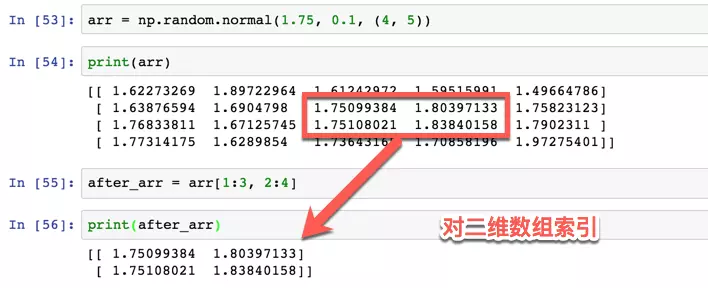

In [ ]:
# numpy
import numpy as np

# 1 2 3
# 4 5 6
# 7 8 9
metrix = np.array([[1,2,3], [4,5,6], [7,8,9]])
metrix[:2, 1:] # slice
metrix[:2, 1:] = 0
metrix # view of data but not copy

In [ ]:
# reshape
print("reshape函数的使用!")
one_20 = np.ones([20])
print("-->1行20列<--")
print (one_20)

one_4_5 = one_20.reshape([4, 5])
print("-->4行5列<--")
print (one_4_5)


#### Numpy calculation

In [ ]:
import numpy as np
stus_score = np.array([[80, 88], [82, 81], [84, 75], [86, 83], [75, 81]])
print stus_score > 80   # 条件判断

print np.where(stus_score < 80, 0, 90)  # 三目运算

print("每一列的最大值为:")
result = np.amax(stus_score, axis=0)
print(result)

print("每一列的最小值为:")
result = np.amin(stus_score, axis=0)
print(result)

print("每一行的最大值为:")
result = np.amax(stus_score, axis=1)
print(result)

print("每一行的最小值为:")
result = np.amin(stus_score, axis=1)
print(result)

print("每一列的平均值:")
result = np.mean(stus_score, axis=0)
print(result)

# 求每一行的平均值(1表示行)
print("每一行的平均值:")
result = np.mean(stus_score, axis=1)
print(result)


In [ ]:
stus_score = np.array([[80, 88], [82, 81], [84, 75], [86, 83], [75, 81]])
print("加分前:")
print(stus_score)

# 为所有平时成绩都加5分
stus_score[:, 0] = stus_score[:, 0]+5
print("加分后:")
print(stus_score)


In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])
c = a + b
d = a - b
e = a * b
f = a / b
print("a+b:", c)
print("a-b:", d)
print("a*b:", e)
print("a/b:", f)

#### np.dot()

(M行, N列) * (N行, Z列) = (M行, Z列)

In [ ]:
stus_score = np.array([[80, 88], [82, 81], [84, 75], [86, 83], [75, 81]])
print stus_score
print("每一行的和为:")
result = np.sum(stus_score, axis=1)
print(result)
# 平时成绩占40% 期末成绩占60%, 计算结果
q = np.array([[0.4], [0.6]])
result = np.dot(stus_score, q)
print("最终结果为:")
print(result)


In [ ]:
import numpy as np
print("v1为:")
v1 = [[0, 1, 2, 3, 4, 5],
      [6, 7, 8, 9, 10, 11]]
v1 = np.array(v1) 
print(v1)
print("v2为:")
v2 = [[12, 13, 14, 15, 16, 17], 
      [18, 19, 20, 21, 22, 23]]
v2 = np.array(v2) 
print(v2)
# 垂直拼接
result = np.vstack((v1, v2))
print("v1和v2垂直拼接的结果为")
print(result)

result = np.hstack((v1, v2))
print("v1和v2水平拼接的结果为")
print(result)


#### numpy.linalg.solve()

- 考虑以下线性方程：

x + y + z = 6

2y + 5z = -4

2x + 5y - z = 27

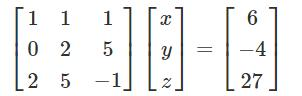

In [ ]:
import numpy as np

a = np.array([[1, 1, 1], [0, 2, 5], [2, 5, -1]])
c = np.array([[6], [-4], [27]])
np.linalg.solve(a,c) 

### practice
implement Fibonacci  sequence with numpy

>  https://blog.csdn.net/wangliyao518/article/details/82954540


### pandas( Python Data Analysis Library)

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

pandas is a NumFOCUS sponsored project. This will help ensure the success of development of pandas as a world-class open-source project, and makes it possible to donate to the project.


Pandas是一款开放源码的BSD许可的Python库，为Python编程语言提供了高性能，易于使用的数据结构和数据分析工具。Pandas用于广泛的领域，包括金融，经济，统计，分析等学术和商业领域。在本教程中，我们将学习Python Pandas的各种功能以及如何在实践中使用它们。

**Pandas处理以下三个数据结构**
- 系列(Series)
- 数据帧(DataFrame)
- 面板(Panel)

In [ ]:
import pandas as pd

s = pd.Series([1,3,5,6,8, 10, 20])

print(s)

In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range('20170101', periods=7)
print(dates)

print("--"*16)
df = pd.DataFrame(np.random.randn(7,4), index=dates, columns=list('ABCD'))
print(df)

面板(Panel)是3D容器的数据。面板数据一词来源于计量经济学，部分源于名称：Pandas - pan(el)-da(ta)-s。

3轴(axis)这个名称旨在给出描述涉及面板数据的操作的一些语义。

它们是 -items - axis 0，每个项目对应于内部包含的数据帧(DataFrame)。

major_axis - axis 1，它是每个数据帧(DataFrame)的索引(行)。

minor_axis - axis 2，它是每个数据帧(DataFrame)的列。

In [ ]:
# creating an empty panel from 3D ndarray
import pandas as pd
import numpy as np

data = np.random.rand(2,4,5)
p = pd.Panel(data)
print p

In [ ]:
#creating an empty panel from DataFrame
import pandas as pd
import numpy as np

data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print p

In [ ]:
# creating an empty panel
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print p['Item1']

## machine learning

Machine Learning is field of study that gives computers the ability to learn without being explicitly programmed.

也就是说机器学习不需要制定具体的模型，而是让计算机根据庞大的数据量自己训练模型，与之相对的，例如CFD软件，是建立在物理模型之上的，例如输运方程等。

https://blog.csdn.net/qq_25867649/article/details/78029849

Learning problems fall into a few categories:

        supervised learning, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:

                classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
                regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

        unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (Click here to go to the Scikit-Learn unsupervised learning page).



In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

excellent = np.random.randint(85, 100,(100))
print 'excellent:', excellent

good = np.random.randint(60, 84, (100))
print 'good:', good

bad = np.random.randint(0, 59, (100))
print 'bad:', bad

y1 = np.array([1]*100)
y2 = np.array([2]*100)
y3 = np.array([3]*100)
y = np.hstack((y1, y2, y3)) #.reshape(1, 3)


X = np.hstack((excellent, good, bad)).reshape(300, 1)


X_test = np.array([39.9, 98, 70]).reshape(3, 1)

print 'X_test:', X_test, X_test.shape
clf = SVC(probability=True)
#clf = OneVsRestClassifier(estimator=SVC(gamma='scale', random_state=0, probability=True))
print '=====', clf.fit(X, y)

my_logreg_proba = clf.predict_proba(X_test)  
my_logreg_pred = clf.predict(X_test)

print X_test, my_logreg_pred

for index in range (3):  
    print(my_logreg_proba[index])  
    print("Predict label:", my_logreg_pred[index])  
    print("Correct label:", X_test[index])


In [ ]:

from sklearn.metrics import classification_report 
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))



## reference

> https://wiki.python.org/moin/Generators

> https://eastlakeside.gitbooks.io/interpy-zh/content/Generators/Generators.html

> https://blog.csdn.net/wangliyao518/article/details/83444107

> https://www.yiibai.com/numpy/numpy_linear_algebra.html

> https://www.jianshu.com/p/83c8ef18a1e8

> https://blog.csdn.net/zhaofrjx/article/details/48394377

> https://www.cnblogs.com/aiguiling/p/8594023.html

> http://pandas.pydata.org/

> https://www.yiibai.com/pandas

> https://www.cnblogs.com/sharon123/p/6828853.html

> https://scikit-learn.org/stable/tutorial/basic/tutorial.html#model-persistence
